In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
θ = np.load('theta.npy')

/home/emma/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


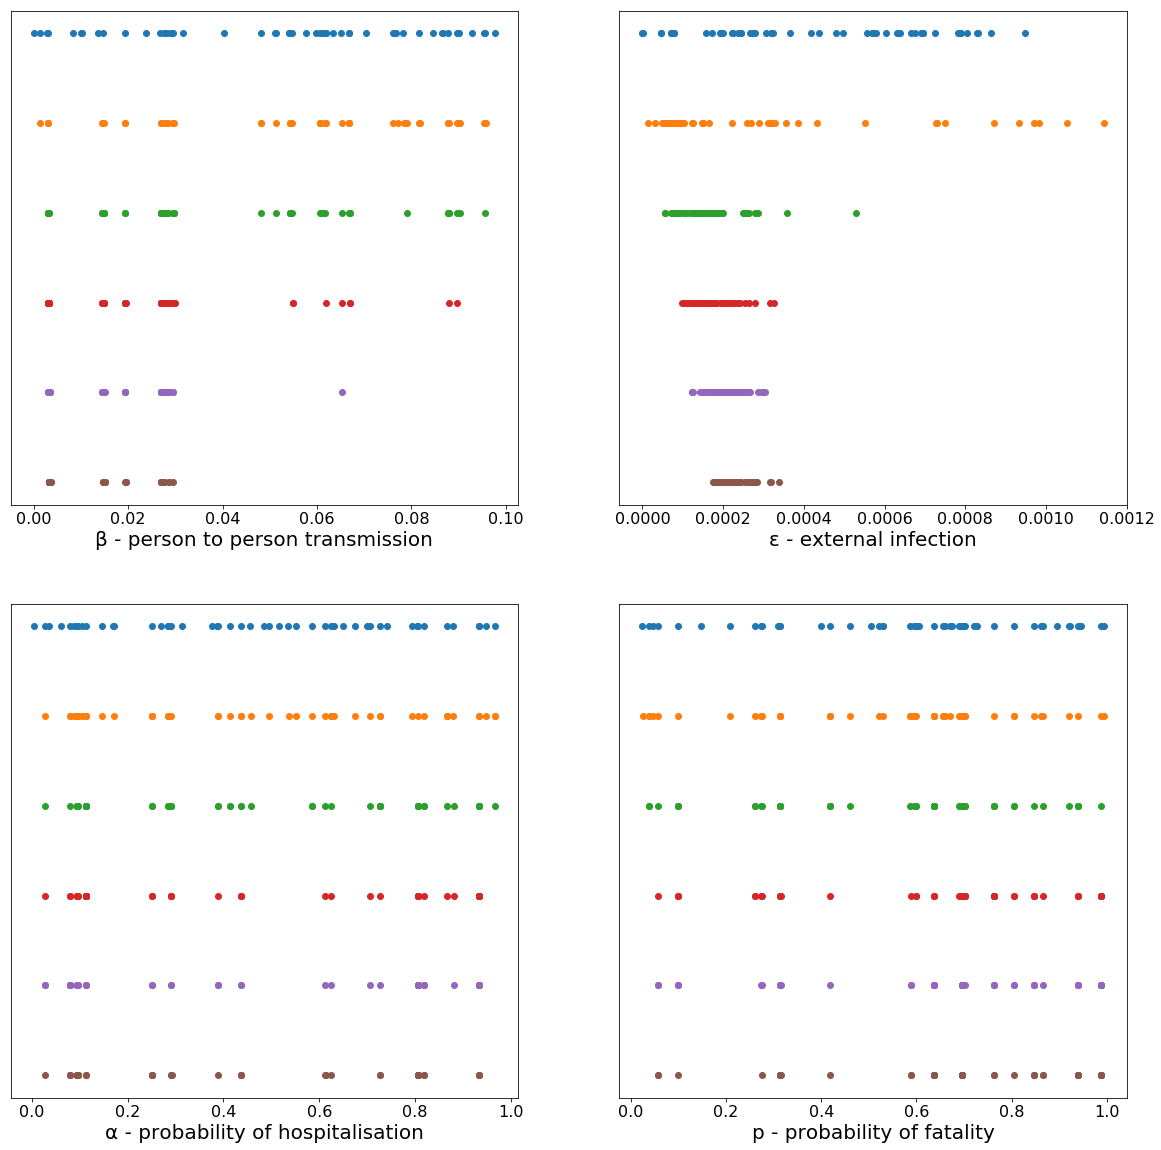

In [12]:
plt.figure(figsize = (20,20))
tol = 6
for i in range(6):
    plt.subplot(2,2,1)
    plt.plot(θ[i][:,0], tol*np.ones(50), 'o' )
    plt.xlabel('β - person to person transmission', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)
    
    plt.subplot(2,2,2)
    plt.plot(θ[i][:,1], tol*np.ones(50), 'o' )
    plt.xlabel('ɛ - external infection', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)

    plt.subplot(2,2,3)
    plt.plot(θ[i][:,2], tol*np.ones(50), 'o' )
    plt.xlabel('α - probability of hospitalisation', fontsize = 20)
    plt.yticks([])
    plt.xticks(fontsize = 16)

    plt.subplot(2,2,4)
    plt.plot(θ[i][:,3], tol*np.ones(50), 'o' )
    plt.xlabel('p - probability of fatality', fontsize = 20)
    plt.yticks([])        
    plt.xticks(fontsize = 16)

    
    tol -=1

/home/emma/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'ɛ')

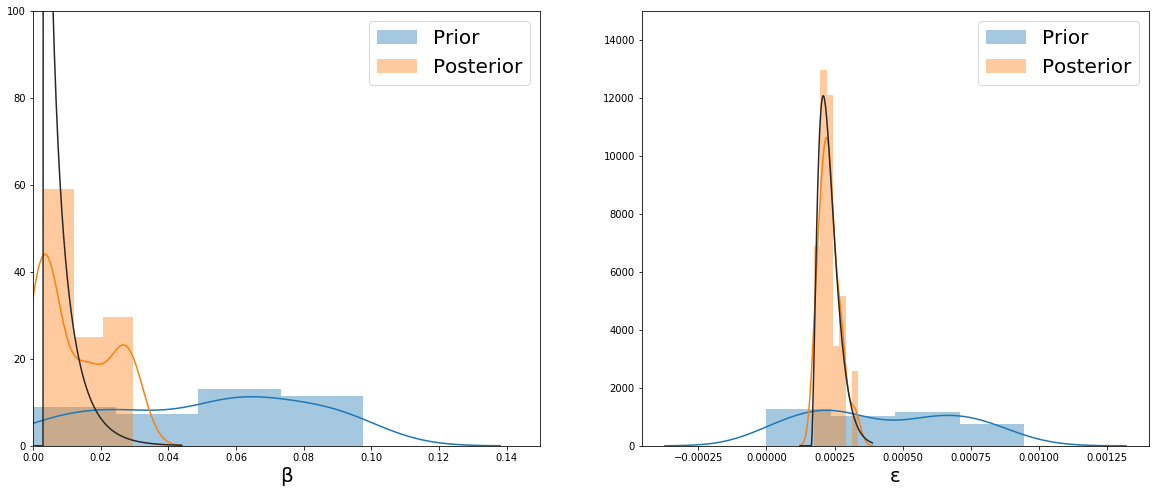

In [13]:
from scipy import stats
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(θ[0][:,0],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot(θ[5][:,0],  kde=True,  norm_hist=False, fit=stats.gamma, label = 'Posterior')
plt.legend(fontsize = 20)
plt.ylim([0, 100])
plt.xlim([0,0.15])
plt.xlabel('β', fontsize = 20)

plt.subplot(1,2,2)
sns.distplot(θ[0][:,1], kde=True,  norm_hist=False, label = 'Prior')
sns.distplot(θ[5][:,1], kde=True,  fit=stats.gamma,  norm_hist=False, label = 'Posterior')
plt.legend(fontsize = 20)
plt.ylim([0, 15000])

plt.xlabel('ɛ', fontsize = 20)

/home/emma/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'p')

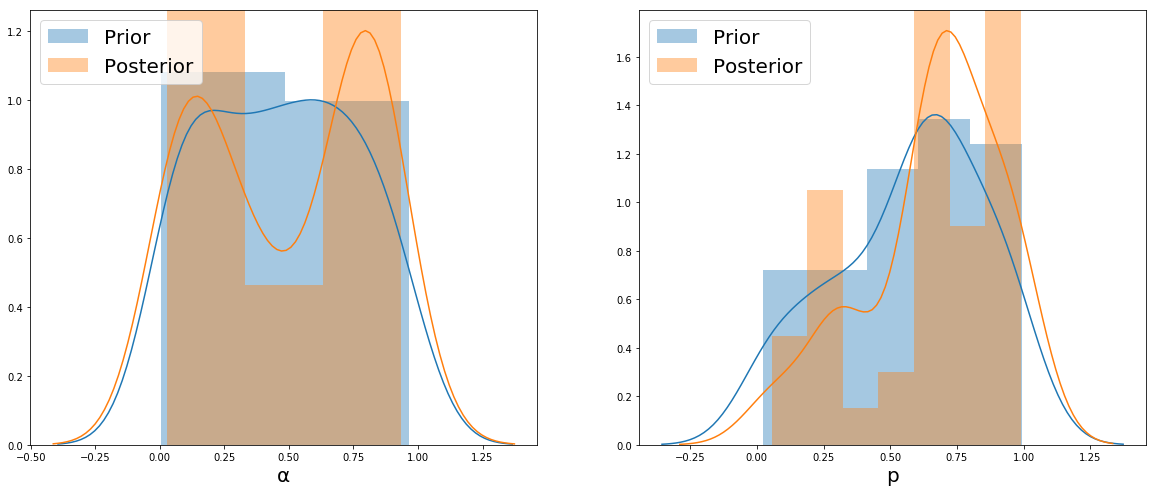

In [31]:
from scipy import stats
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.distplot(θ[0][:,2],  kde=True,  norm_hist=False, label = 'Prior')
sns.distplot(θ[5][:,2],  kde=True,  norm_hist=False,  label = 'Posterior')
plt.legend(fontsize = 20)
# plt.ylim([0, 100])
# plt.xlim([0,0.15])
plt.xlabel('α', fontsize = 20)

plt.subplot(1,2,2)
sns.distplot(θ[0][:,3], kde=True,  norm_hist=False, label = 'Prior')
sns.distplot(θ[5][:,3], kde=True,  norm_hist=False, label = 'Posterior')
plt.legend(fontsize = 20)
# plt.ylim([0, 15000])

plt.xlabel('p', fontsize = 20)

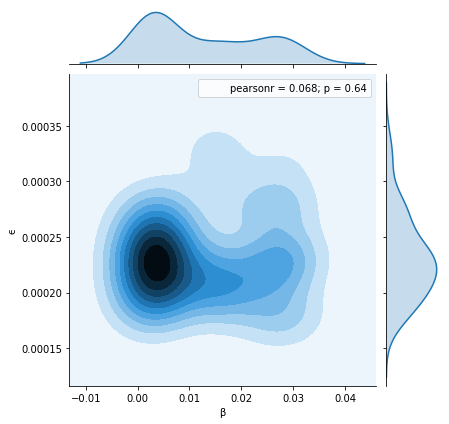

In [24]:
d = {'β': θ[5][:,0], 'ϵ': θ[5][:,1], 'α': θ[5][:,2], 'p': θ[5][:,3]}
df = pd.DataFrame(data = d)
sns.jointplot(x="β", y="ϵ", data=df, kind="kde");

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/emma/.local/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


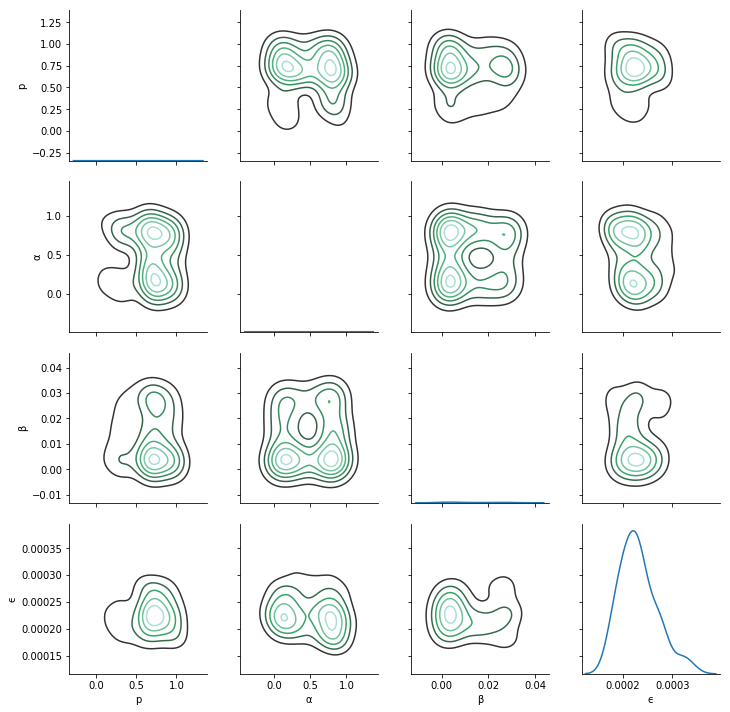

In [30]:
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);